# Example E2: Parallel fault network extraction from 2-D numerical model
 This example describes how to extract a 2-D fault network from a numerical model simulating continental rifting in parallel. This example is based on the study of Naliboff et al. (2020).

## Setup

1. First, you will need sign in to your Google account. If you're not signed in, you can sign in [here](https://myaccount.google.com/?utm_source=sign_in_no_continue)
2. Next, head on to the [Colab Welcome Page](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true).
3. There, select Github in the top tab and search for https://github.com/thilowrona/fault_analysis_toolbox/blob/master/examples/example-1/example-1.ipynb
4. Clicking opens this notebook. This is a Jupyter notebook; an awesome combination of code and documentation allowing us work on, describe and share our projects.
5. When you run the first cell, you will face a pop-up saying ‘Warning: This notebook was not authored by Google’; you should click on ‘Run Anyway’ to get rid of the warning.
6. Next we want to save our notebook. If you click on ‘File’ and then ‘Save’, you will see a pop-up saying ´CANNOT SAVE CHANGES´. Now, click on ‘SAVE A COPY IN DRIVE’. This opens up a new tab with the same file, but this time located in your Drive. If you want to continue working after saving, use the file in the new tab. Your notebook will be saved in a folder called Colab Notebooks in your Google Drive by default.

## Load packages
To run the toolbox, we will need a couple of packages including the toolbox itself. So let's install them:

In [1]:
!pip3 install git+https://github.com/thilowrona/fatbox.git

  Cloning https://github.com/thilowrona/fatbox.git to /tmp/pip-req-build-v71s37g0
  Running command git clone -q https://github.com/thilowrona/fatbox.git /tmp/pip-req-build-v71s37g0
     |████████████████████████████████| 163kB 3.0MB/s 
     |████████████████████████████████| 103.4MB 54kB/s 
  Cloning https://github.com/ulikoehler/cv_algorithms.git to /tmp/pip-install-kjfhkgs3/cv-algorithms
  Running command git clone -q https://github.com/ulikoehler/cv_algorithms.git /tmp/pip-install-kjfhkgs3/cv-algorithms
  Created wheel for fatbox: filename=fatbox-0.0.1-cp37-none-any.whl size=25848 sha256=f6f1ba29514f936e381b1743f4d502c697c810f89d3d7af7c0422bfb28f3f7be
  Stored in directory: /tmp/pip-ephem-wheel-cache-lijn59qs/wheels/3c/75/06/4f57a6a85e140ffdf1280b29ebde7d5e62277dfc68e4aeb466
  Created wheel for network: filename=network-0.1-cp37-none-any.whl size=3157 sha256=3f63c9a0f0e647a35ab551cb650683d7cb6e53ced3b7d6bada1c5cc2436b584d
  Stored in directory: /root/.cache/pip/wheels/f6/e7/6a/7098

In [2]:
!git clone https://github.com/thilowrona/fatbox_tutorials

Cloning into 'fatbox_tutorials'...
remote: Enumerating objects: 326, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 326 (delta 51), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (326/326), 30.81 MiB | 13.44 MiB/s, done.
Resolving deltas: 100% (122/122), done.


Now we can load the python packages:

In [3]:
import numpy as np 
import networkx as nx
import pickle

import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

from sys import stdout

and the functions from the fault analysis toolbox that we want to use:

In [4]:
from fatbox.preprocessing import skeleton_guo_hall, array_to_points
from fatbox.edits import label_components
from fatbox.plots import plot_components

## Fault extraction

First, we load our data - a strain rate map extracted just below the surface of the model:

In [6]:
strain_rate = np.load('/content/fatbox_tutorials/1-fault_extraction/NearSurfaceIsotherm_335K_strain_rate.npy')

Now we can plot it to visualize the faults in the model

In [8]:
from joblib import Parallel, delayed
import multiprocessing

inputs = range(1, 11) 

def processInput(value):
    threshold = np.where(strain_rate > value*1e-14, 1, 0).astype(np.uint8)

    skeleton = skeleton_guo_hall(threshold)

    points = array_to_points(skeleton)

    G = nx.Graph()
    for node, point in enumerate(points):
        G.add_node(node)
        G.nodes[node]['pos'] = point

    dm = distance_matrix(points, points) 

    for n in range(points.shape[0]):
        for m in range(points.shape[0]):
            if dm[n,m]<1.5:
                G.add_edge(n,m)

    G = label_components(G)

    return G



num_cores = multiprocessing.cpu_count()

print(num_cores)

results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)



2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

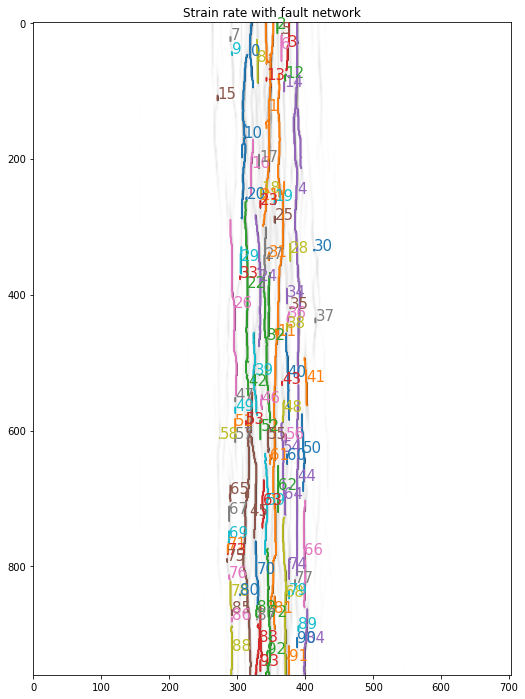

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

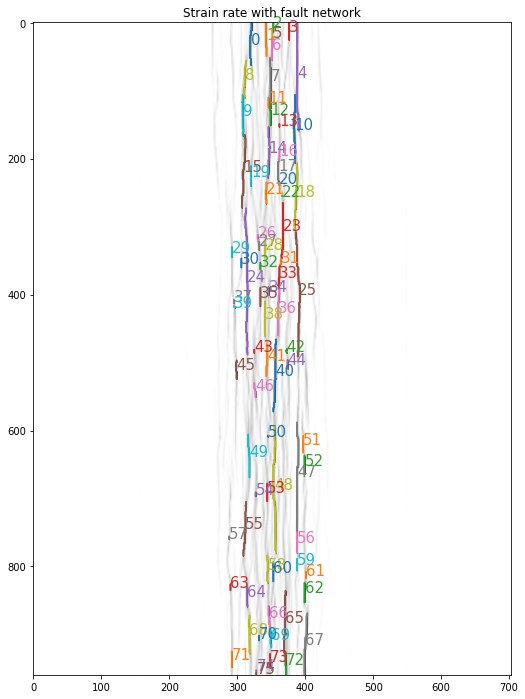

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

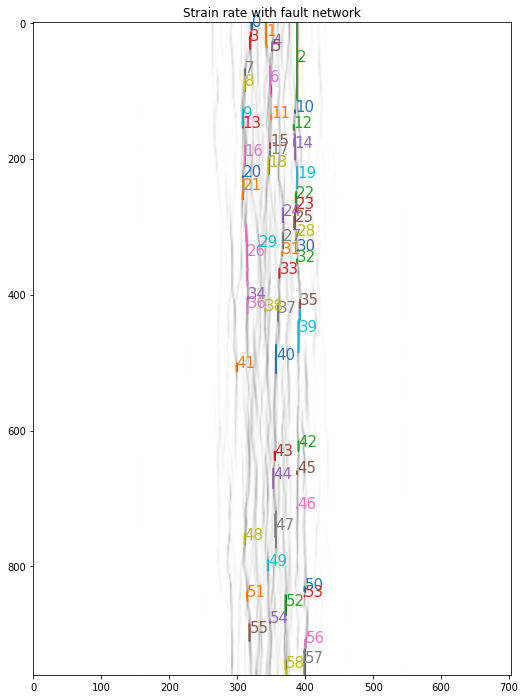

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

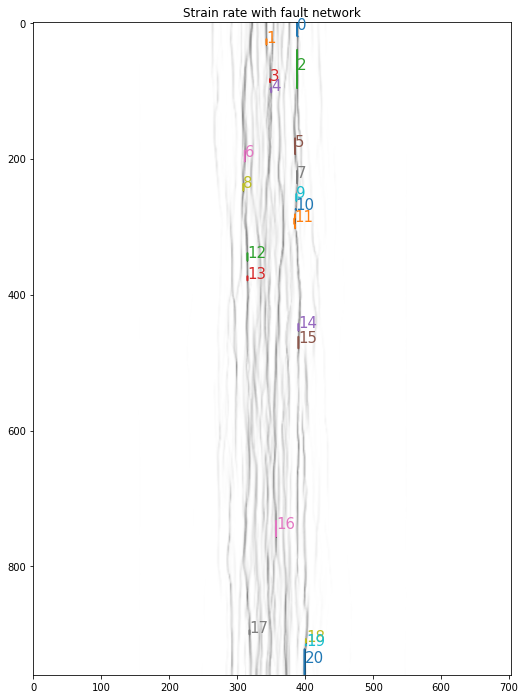

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

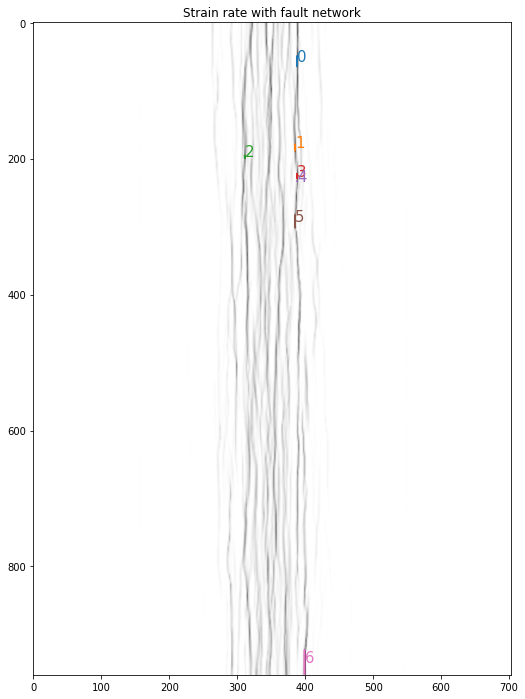

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

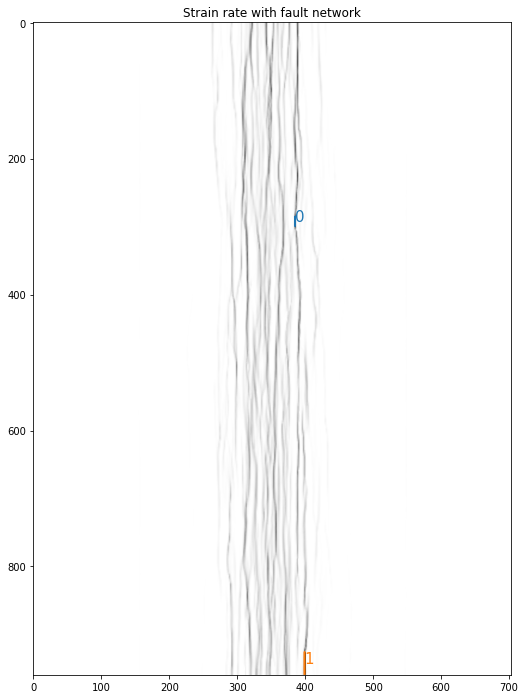

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

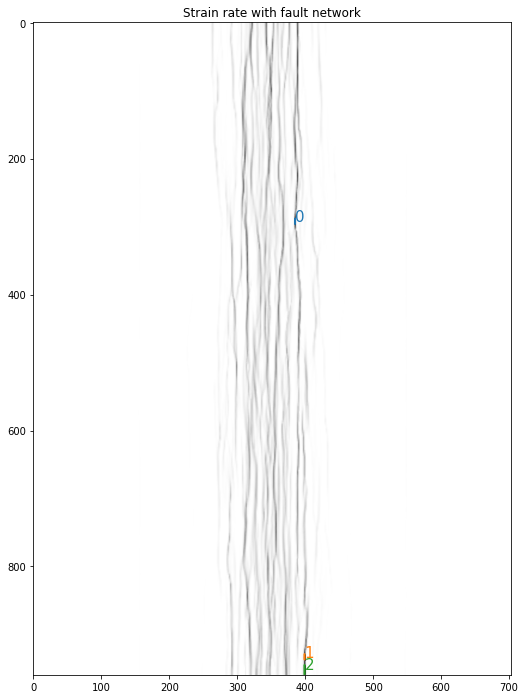

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

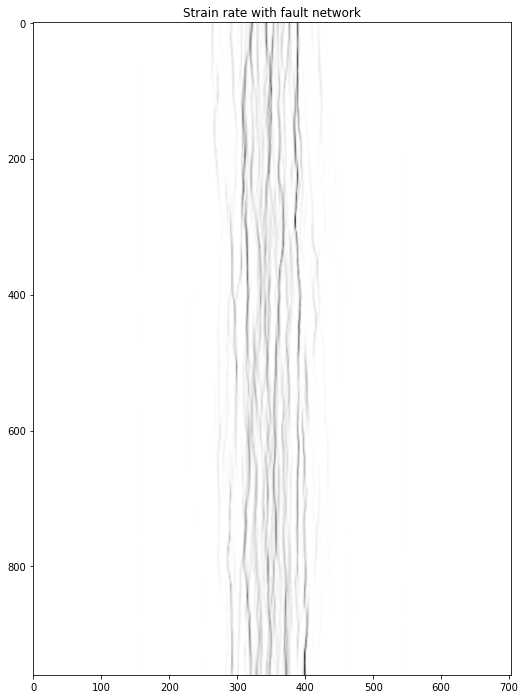

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

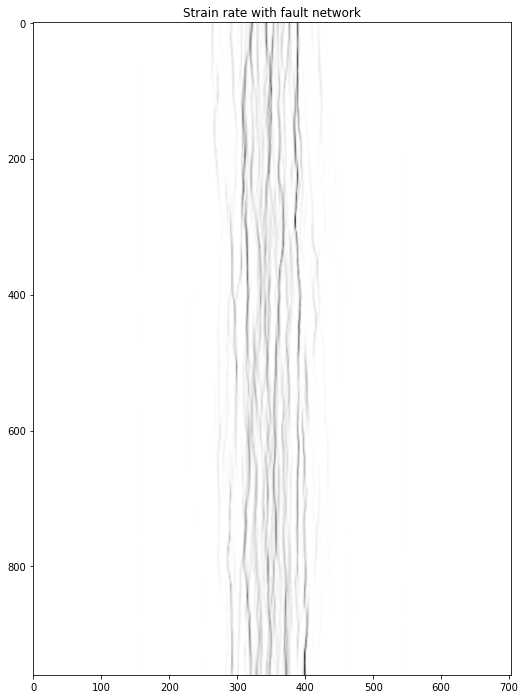

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

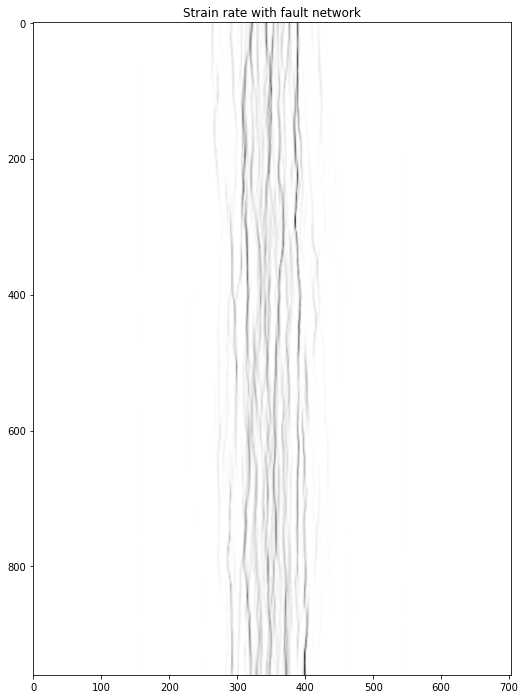

<IPython.core.display.Javascript object>

In [9]:
from google.colab import widgets

tb = widgets.TabBar([str(i) for i in range(1,11)])

for i in range(10):
  with tb.output_to(i):
    fig, axs = plt.subplots(1, 1, figsize=(12,12))
    axs.imshow(strain_rate, 'gray_r', vmin=0)
    plot_components(results[i], axs, label=True)
    plt.title('Strain rate with fault network')

